In [1]:
import numpy as np 
import pandas as pd
import os
import joblib
import sklearn 
import matplotlib
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

#Regressions:

from sklearn.multioutput import MultiOutputRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

#Metric
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


from pandas import DataFrame


# Show progress bar
from tqdm import tqdm

In [2]:
df = pd.read_csv('dataset_augmented.csv')
df

,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,in_amount_mmol,p_amount_mmol,sol_amount_ml,TOP_amount_mmol,acid_amount_mmol,amine_amount_mmol,...,x8_superhydride,x8_tetrabutylammonium myristate,x8_trioctylamine,x8_trioctylphosphine oxide,x8_water,x8_zinc iodide,diameter_nm,abs_nm,emission_nm,Unnamed: 64
0,0,0,0,0,-0.205407,-0.376673,1.638502,-0.220165,0.095362,-0.800754,...,1,0,0,0,0,0,3.500000,562,618,56
1,1,1,1,1,-0.205407,-0.376673,1.638502,-0.220165,0.095362,-0.800754,...,1,0,0,0,0,0,1.916667,473,574,101
2,2,2,2,2,-0.205407,-0.376673,1.638502,-0.220165,0.095362,-0.800754,...,1,0,0,0,0,0,2.907619,524,574,50
3,3,3,3,3,-0.205407,-0.376673,1.638502,-0.220165,0.095362,-0.800754,...,1,0,0,0,0,0,2.907619,538,590,52
4,4,4,4,4,-0.205407,-0.376673,1.638502,-0.220165,0.095362,-0.800754,...,1,0,0,0,0,0,2.907619,576,618,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,145,152,152,152,-0.467859,-0.729457,-0.258929,0.421871,-0.453863,-0.800754,...,0,0,0,0,0,0,2.907619,552,601,49
146,146,153,153,153,-0.717189,-0.779855,-0.069186,-0.220165,-0.344018,-0.800754,...,0,0,0,0,0,0,8.300000,532,590,58
147,147,154,154,154,-0.717189,-0.779855,-0.069186,-0.220165,-0.344018,-0.800754,...,0,0,0,0,0,0,8.300000,570,618,48
148,148,155,155,155,-0.717189,-0.779855,-0.069186,-0.220165,-0.344018,-0.800754,...,0,0,0,0,0,0,8.300000,562,618,56


In [3]:
# Input for ML models

input_col = ['in_amount_mmol',
             'p_amount_mmol',
             'sol_amount_ml',
             'TOP_amount_mmol',
             'acid_amount_mmol',
             'amine_amount_mmol',
             'thiol_amount_mmol',
             'zinc_amount_mmol',
             'other_amount_mmol',
             'total_volume_ml',
             'temp_c',
             'time_min',
             'x0_indium acetate',
             'x0_indium bromide',
             'x0_indium chloride',
             'x0_indium iodide',
             'x0_indium myristate',
             'x0_indium trifluoroacetate',
             'x1_bis(trimethylsilyl)phosphine',
             'x1_phosphorus trichloride',
             'x1_tris(diethylamino)phosphine',
             'x1_tris(dimethylamino)phosphine',
             'x1_tris(trimethylgermyl)phosphine',
             'x1_tris(trimethylsilyl)phosphine',
             'x2_None',
             'x2_octadecene',
             'x2_toluene',
             'x3_None',
             'x3_trioctylphosphine',
             'x4_None',
             'x4_lauric acid',
             'x4_myristic acid',
             'x4_oleic acid',
             'x4_palmitic acid',
             'x4_stearic acid',
             'x5_None',
             'x5_dioctylamine',
             'x5_dodecylamine',
             'x5_hexadecylamine',
             'x5_octylamine',
             'x5_oleylamine',
             'x6_None',
             'x7_None',
             'x7_zinc bromide',
             'x7_zinc chloride',
             'x7_zinc iodide',
             'x7_zinc oleate',
             'x7_zinc stearate',
             'x7_zinc undecylenate',
             'x8_None',
             'x8_acetic acid',
             'x8_copper bromide',
             'x8_superhydride',
             'x8_tetrabutylammonium myristate',
             'x8_trioctylamine',
             'x8_trioctylphosphine oxide',
             'x8_water',
             'x8_zinc iodide'
            ]
#Three individual outputs:
diameter = ['diameter_nm']
emission = ['emission_nm']
absorbance = ['abs_nm']

#Splitting dataset

X = df[input_col]

Y_d = df[diameter]
Y_e = df[emission]
Y_a = df[absorbance]


X_train_d, X_test_d, Y_train_d, Y_test_d = train_test_split(X, Y_d, test_size=0.15, random_state=45, shuffle=True)
X_train_e, X_test_e, Y_train_e, Y_test_e = train_test_split(X, Y_e, test_size=0.15, random_state=45, shuffle=True)
X_train_a, X_test_a, Y_train_a, Y_test_a = train_test_split(X, Y_a, test_size=0.15, random_state=45, shuffle=True)

## D - Optimizing diameter model


### 1D. Extra Trees

In [4]:
# This is a grid search for three parameters in the Extra Trees algorithm. 
# Parameters are: random_state, n_estimators, max_features.

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 25)):
    for j in range(1, 25):
        for k in range(2, 50, 1):
            ET_regr = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k)
            
            ET_regr.fit(X_train_d, np.ravel(Y_train_d))
            ET_Y_pred_d = pd.DataFrame(ET_regr.predict(X_test_d))

            mae = mean_absolute_error(Y_test_d, ET_Y_pred_d)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 24/24 [08:29<00:00, 21.24s/it]

0.13260869565217392 2 23 6


### 2D. Decision Tree 

In [5]:
# This is a grid search for three parameters in the Decision Trees algorithm. 
# Parameters are: max_depth, max_features, random_state.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        for k in range(4, 80, 2):
            
            DT_regr = DecisionTreeRegressor(max_depth=i,
                                max_features=j,
                                random_state=k)
            
            DT_regr.fit(X_train_d, np.ravel(Y_train_d))
            DT_Y_pred_d = pd.DataFrame(DT_regr.predict(X_test_d))

            mae = mean_absolute_error(Y_test_d, DT_Y_pred_d)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 29/29 [03:29<00:00,  7.24s/it]

0.15819875776397513 15 10 36


### 3D. Random Forest

In [6]:
# This is a grid search for three parameters in the Random Forest algorithm. 
# Parameters are: max_depth, n_estimators, max_features.
# Random_state is set to 45.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 31)):
    for j in range(1, 31):
        for k in range(2, 50, 1):
            RF_regr = RandomForestRegressor(max_depth=i, 
                                            n_estimators=j, 
                                            max_features=k,
                                            random_state=45)
            RF_regr.fit(X_train_d, np.ravel(Y_train_d))
            RF_Y_pred_d = pd.DataFrame(RF_regr.predict(X_test_d))

            mae = mean_absolute_error(Y_test_d, RF_Y_pred_d)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 30/30 [19:46<00:00, 39.54s/it]

0.196535541752933 9 2 13


### 4D. K Neighbors

In [7]:
min_mae = 99999
min_i, min_j = 0, 0

for i in tqdm(range(1, 40)):
    for j in range(1, 40):

        KNN_reg_d = KNeighborsRegressor(n_neighbors=i, 
                                      p=j).fit(X_train_d, np.ravel(Y_train_d))

        KNN_Y_pred_d = KNN_reg_d.predict(X_test_d)

        mae = mean_absolute_error(Y_test_d, KNN_Y_pred_d)

        if (min_mae > mae):
            min_mae = mae
            min_i = i
            min_j = j

print(min_mae, min_i, min_j)

100%|██████████| 39/39 [00:14<00:00,  2.66it/s]

0.2583954451345755 2 2


### Saving Decision Tree model

In [5]:
ET_regr_d = ExtraTreesRegressor(n_estimators=2, 
                                            max_features=23,
                                            random_state=6)
            
ET_regr_d.fit(X_train_d, np.ravel(Y_train_d))
ET_Y_pred_d = pd.DataFrame(ET_regr_d.predict(X_test_d))
joblib.dump(ET_regr_d, "./model_SO_diameter_ExtraTrees.joblib")

['./model_SO_diameter_ExtraTrees.joblib']

## E - Optimizing emission model


### 1E. Extra Trees

In [9]:
# This is a grid search for three parameters in the Extra Trees algorithm. 
# Parameters are: random_state, n_estimators, max_features.

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 25)):
    for j in range(1, 25):
        for k in range(2, 50, 1):
            ET_regr_e = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k)
            
            ET_regr_e.fit(X_train_e, np.ravel(Y_train_e))
            ET_Y_pred_e = pd.DataFrame(ET_regr_e.predict(X_test_e))

            mae = mean_absolute_error(Y_test_e, ET_Y_pred_e)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 24/24 [07:54<00:00, 19.79s/it]

10.130434782608695 1 21 36


### 2E. Decision Trees

In [10]:
# This is a grid search for three parameters in the Decision Trees algorithm. 

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        for k in range(4, 80, 2):
            
            DT_regr_e = DecisionTreeRegressor(max_depth=i,
                                max_features=j,
                                random_state=k)
            
            DT_regr_e.fit(X_train_e, np.ravel(Y_train_e))
            DT_Y_pred_e = pd.DataFrame(DT_regr_e.predict(X_test_e))

            mae = mean_absolute_error(Y_test_e, DT_Y_pred_e)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 29/29 [03:14<00:00,  6.70s/it]

9.880434782608695 12 19 78


### 3E. Random Forest

In [12]:
min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 27)):
    for j in range(1, 27):
        for k in range(2, 46, 1):
            RF_regr_e = RandomForestRegressor(max_depth=i, 
                                            n_estimators=j, 
                                            max_features=k,
                                            random_state=45)
            RF_regr_e.fit(X_train_e, np.ravel(Y_train_e))
            RF_Y_pred_e = pd.DataFrame(RF_regr_e.predict(X_test_e))

            mae = mean_absolute_error(Y_test_e, RF_Y_pred_e)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 26/26 [12:06<00:00, 27.95s/it]

15.48913043478261 21 16 36


### 4E. K Neighbors

In [13]:
min_mae = 99999
min_i, min_j = 0, 0

for i in tqdm(range(1, 40)):
    for j in range(1, 40):

        KNN_reg_e = KNeighborsRegressor(n_neighbors=i, 
                                      p=j).fit(X_train_e, np.ravel(Y_train_e))

        KNN_Y_pred_e = KNN_reg_e.predict(X_test_e)

        mae = mean_absolute_error(Y_test_e, KNN_Y_pred_e)

        if (min_mae > mae):
            min_mae = mae
            min_i = i
            min_j = j

print(min_mae, min_i, min_j)

100%|██████████| 39/39 [00:17<00:00,  2.19it/s]

21.23913043478261 2 3


### Saving Extra Trees model

In [6]:
DT_regr_e = DecisionTreeRegressor(max_depth=12,
                                max_features=19,
                                random_state=78)
            
DT_regr_e.fit(X_train_e, np.ravel(Y_train_e))
DT_Y_pred_e = pd.DataFrame(DT_regr_e.predict(X_test_e))

joblib.dump(DT_regr_e, "./model_SO_emission_DecisionTree.joblib")

['./model_SO_emission_DecisionTree.joblib']

## A - Optimizing absorption model


### 1A: Extra Trees

In [14]:
# This is a grid search for three parameters in the Extra Trees algorithm. 
# Parameters are: random_state, n_estimators, max_features.

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        for k in range(2, 48, 1):
            ET_regr_a = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k)
            
            ET_regr_a.fit(X_train_a, np.ravel(Y_train_a))
            ET_Y_pred_a = pd.DataFrame(ET_regr_a.predict(X_test_a))

            mae = mean_absolute_error(Y_test_a, ET_Y_pred_a)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 29/29 [13:26<00:00, 27.83s/it]

15.891304347826088 2 19 2


### 2A. Decision Trees


In [15]:
# This is a grid search for three parameters in the Decision Trees algorithm. 

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 28)):
    for j in range(1, 28):
        for k in range(4, 46, 1):
            
            DT_regr_a = DecisionTreeRegressor(max_depth=i,
                                max_features=j,
                                random_state=k)
            
            DT_regr_a.fit(X_train_a, np.ravel(Y_train_a))
            DT_Y_pred_a = pd.DataFrame(DT_regr_a.predict(X_test_a))

            mae = mean_absolute_error(Y_test_a, DT_Y_pred_a)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 27/27 [03:14<00:00,  7.22s/it]

17.652173913043477 21 25 21


In [ ]:
DT_regr_a = DecisionTreeRegressor(max_depth=20,
                                max_features=20,
                                random_state=12).fit(X_train_a, np.ravel(Y_train_a))
                  
DT_Y_pred_a = DT_regr_a.predict(X_test_a)


DT_r2_a = r2_score(Y_test_a, DT_Y_pred_a)
DT_MSE_a = mean_squared_error(Y_test_a, DT_Y_pred_a)
DT_RMSE_a = mean_squared_error(Y_test_a, DT_Y_pred_a, squared=False)
DT_MAE_a = mean_absolute_error(Y_test_a, DT_Y_pred_a)
print('diameter:', 'r2:', DT_r2_a, '; MSE:', DT_MSE_a, '; RMSE:', DT_RMSE_a, '; MAE:', DT_MAE_a)

### 3A. Random Forest

In [17]:
min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 25)):
    for j in range(1, 25):
        for k in range(2, 42, 1):
            RF_regr_a = RandomForestRegressor(max_depth=i, 
                                            n_estimators=j, 
                                            max_features=k,
                                            random_state=45)
            RF_regr_a.fit(X_train_a, np.ravel(Y_train_a))
            RF_Y_pred_a = pd.DataFrame(RF_regr_a.predict(X_test_a))

            mae = mean_absolute_error(Y_test_a, RF_Y_pred_a)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 24/24 [06:53<00:00, 17.22s/it]

27.354589371980673 14 9 16


### 4A. K Neighbors

In [18]:
min_mae = 99999
min_i, min_j = 0, 0

for i in tqdm(range(1, 40)):
    for j in range(1, 40):

        KNN_reg_a = KNeighborsRegressor(n_neighbors=i, 
                                      p=j).fit(X_train_a, np.ravel(Y_train_a))

        KNN_Y_pred_a = KNN_reg_a.predict(X_test_a)

        mae = mean_absolute_error(Y_test_a, KNN_Y_pred_a)

        if (min_mae > mae):
            min_mae = mae
            min_i = i
            min_j = j

print(min_mae, min_i, min_j)

100%|██████████| 39/39 [00:12<00:00,  3.13it/s]

32.06521739130435 2 4


### Saving model

In [7]:
ET_regr_a = ExtraTreesRegressor(n_estimators=2, 
                                            max_features=19,
                                            random_state=2)
            
ET_regr_a.fit(X_train_a, np.ravel(Y_train_a))
ET_Y_pred_a = pd.DataFrame(ET_regr_a.predict(X_test_a))

joblib.dump(ET_regr_a, "./model_SO_abs_ExtraTrees.joblib")

['./model_SO_abs_ExtraTrees.joblib']

## Analyzing

In [4]:
## Diameter

ET_regr_d = ExtraTreesRegressor(n_estimators=2, 
                                            max_features=23,
                                            random_state=6)
            
ET_regr_d.fit(X_train_d, np.ravel(Y_train_d))
ET_Y_pred_d = ET_regr_d.predict(X_test_d)

D_mae = mean_absolute_error(Y_test_d, ET_Y_pred_d)
D_r_2 = r2_score(Y_test_d, ET_Y_pred_d)
D_mse = mean_squared_error(Y_test_d, ET_Y_pred_d)
D_rmse = mean_squared_error(Y_test_d, ET_Y_pred_d, squared=False)

## Emission

DT_regr_e = DecisionTreeRegressor(max_depth=12,
                                max_features=19,
                                random_state=78)
            
DT_regr_e.fit(X_train_e, np.ravel(Y_train_e))
DT_Y_pred_e = DT_regr_e.predict(X_test_e)

E_mae = mean_absolute_error(Y_test_e, DT_Y_pred_e)
E_r_2 = r2_score(Y_test_e, DT_Y_pred_e)
E_mse = mean_squared_error(Y_test_e, DT_Y_pred_e)
E_rmse = mean_squared_error(Y_test_e, DT_Y_pred_e, squared=False)


### Absorption

ET_regr_a = ExtraTreesRegressor(n_estimators=2, 
                                            max_features=19,
                                            random_state=2)
            
ET_regr_a.fit(X_train_a, np.ravel(Y_train_a))
ET_Y_pred_a = ET_regr_a.predict(X_test_a)

A_mae = mean_absolute_error(Y_test_a, ET_Y_pred_a)
A_r_2 = r2_score(Y_test_a, ET_Y_pred_a)
A_mse = mean_squared_error(Y_test_a, ET_Y_pred_a)
A_rmse = mean_squared_error(Y_test_a, ET_Y_pred_a, squared=False)


from tabulate import tabulate

d = [ ["Diameter", D_r_2, D_mae, D_mse, D_rmse],
     ["Absorption", A_r_2, A_mae, A_mse, A_rmse],
     ["Emission", E_r_2, E_mae, E_mse, E_rmse]]

print(tabulate(d, headers=["Outputs", "R2", "Mean absolute error", "Mean squared error", "Root mean squared error"]))

Outputs           R2    Mean absolute error    Mean squared error    Root mean squared error
----------  --------  ---------------------  --------------------  -------------------------
Diameter    0.845217               0.132609             0.0735826                   0.271261
Absorption  0.857639              15.8913             511.185                      22.6094
Emission    0.823755               9.88043            274.383                      16.5645


In [6]:
from numpy import std, absolute, mean

def interval(data, confidence):
    MAD = mean(absolute(data - mean(data)))*confidence
    return MAD


In [10]:
MAD_d = interval(ET_Y_pred_d, 1.6)
MAD_e = interval(DT_Y_pred_e, 1.6)
MAD_a = interval(ET_Y_pred_a, 1.6)

print("Diameter: ", MAD_d, "; Emission: ", MAD_e, "; absorption: ", MAD_a)

Diameter:  0.6437360698532723 ; Emission:  41.44423440453687 ; absorption:  58.27750472589794


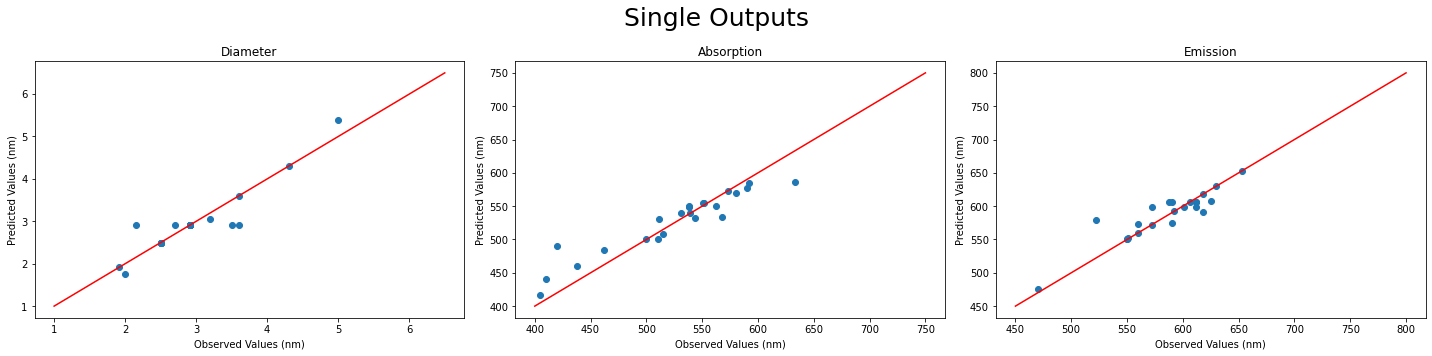

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Single Outputs', fontsize=25)

ax1.plot(Y_test_d, ET_Y_pred_d,'o')
ax1.plot([1,6.5],[1,6.5], color = 'r')
ax1.set_title('Diameter')
ax1.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax2.plot(Y_test_a, ET_Y_pred_a,'o')
ax2.plot([400,750],[400,750], color = 'r')
ax2.set_title('Absorption')
ax2.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax3.plot(Y_test_e, DT_Y_pred_e,'o')
ax3.plot([450,800],[450,800], color = 'r')
ax3.set_title('Emission')
ax3.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')


fig.tight_layout()

## Feature importance

### For diameter prediction

In [18]:
importance_dict_d = dict()
for i in range(0,58):
    importance_dict_d[input_col[i]] = ET_regr_d.feature_importances_[i]

sorted_importance_d = sorted(importance_dict_d.items(), key=lambda x: x[1], reverse=True)

sorted_importance_d


[('x0_indium trifluoroacetate', 0.28324582222296196),
 ('total_volume_ml', 0.20297332059063816),
 ('x4_myristic acid', 0.08161870642350577),
 ('temp_c', 0.0777631515484468),
 ('time_min', 0.07708367016514253),
 ('x7_zinc chloride', 0.041250900046294336),
 ('x5_dioctylamine', 0.037637602524626834),
 ('amine_amount_mmol', 0.03637355292221555),
 ('p_amount_mmol', 0.029930858398343897),
 ('x7_zinc iodide', 0.029831392829762472),
 ('in_amount_mmol', 0.01620215432071895),
 ('x7_zinc oleate', 0.009941355568337728),
 ('x2_None', 0.009081086592608777),
 ('x7_None', 0.008524216866782534),
 ('x8_None', 0.008417300971652214),
 ('x0_indium chloride', 0.007454484380334543),
 ('other_amount_mmol', 0.006764429720962395),
 ('x5_None', 0.006717402622659225),
 ('x1_tris(trimethylsilyl)phosphine', 0.00617121820671876),
 ('x5_oleylamine', 0.005962960099981673),
 ('acid_amount_mmol', 0.005184525737431052),
 ('zinc_amount_mmol', 0.00230474128835182),
 ('sol_amount_ml', 0.0020430996975447763),
 ('x4_palmitic 

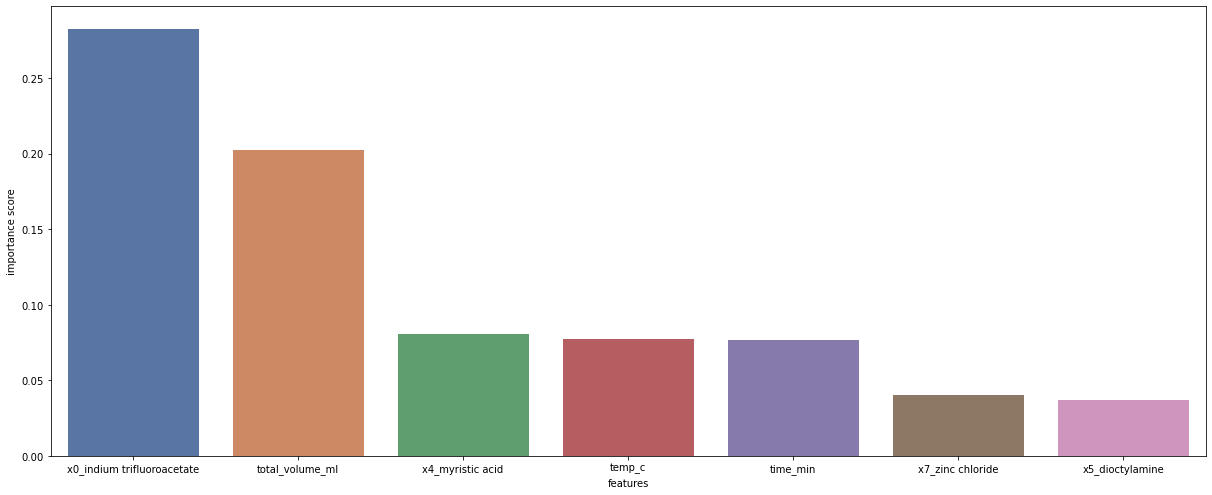

In [19]:
top7_d = DataFrame(sorted_importance_d[0:7], columns=['features', 'importance score'])

others_d = DataFrame(sorted_importance_d[7:], columns=['features', 'importance score'])


import seaborn as sns

a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="features", y="importance score", data=top7_d)

### Emission prediction

In [20]:
importance_dict_e = dict()
for i in range(0,58):
    importance_dict_e[input_col[i]] = DT_regr_e.feature_importances_[i]

sorted_importance_e = sorted(importance_dict_e.items(), key=lambda x: x[1], reverse=True)


sorted_importance_e


[('x7_zinc iodide', 0.1547305879286684),
 ('time_min', 0.1090767963344036),
 ('x0_indium acetate', 0.0989758292673849),
 ('x7_zinc bromide', 0.09168255910782082),
 ('x7_None', 0.07775129548134563),
 ('acid_amount_mmol', 0.06708215423621987),
 ('temp_c', 0.06394820758807003),
 ('x0_indium iodide', 0.05253443078374938),
 ('zinc_amount_mmol', 0.04750961583230465),
 ('x7_zinc oleate', 0.04552063625606104),
 ('total_volume_ml', 0.03307309993300321),
 ('p_amount_mmol', 0.02143094938776424),
 ('x5_hexadecylamine', 0.02012151149936218),
 ('x2_octadecene', 0.017909293616739222),
 ('other_amount_mmol', 0.017330486278017962),
 ('x4_oleic acid', 0.012147274319260935),
 ('sol_amount_ml', 0.010266426557194428),
 ('x3_trioctylphosphine', 0.009953073590292462),
 ('x4_myristic acid', 0.008772529604889202),
 ('x0_indium chloride', 0.008704975662004427),
 ('x1_tris(diethylamino)phosphine', 0.008584336638092998),
 ('x4_stearic acid', 0.006475877911582191),
 ('x2_None', 0.004746568791598776),
 ('x1_tris(di

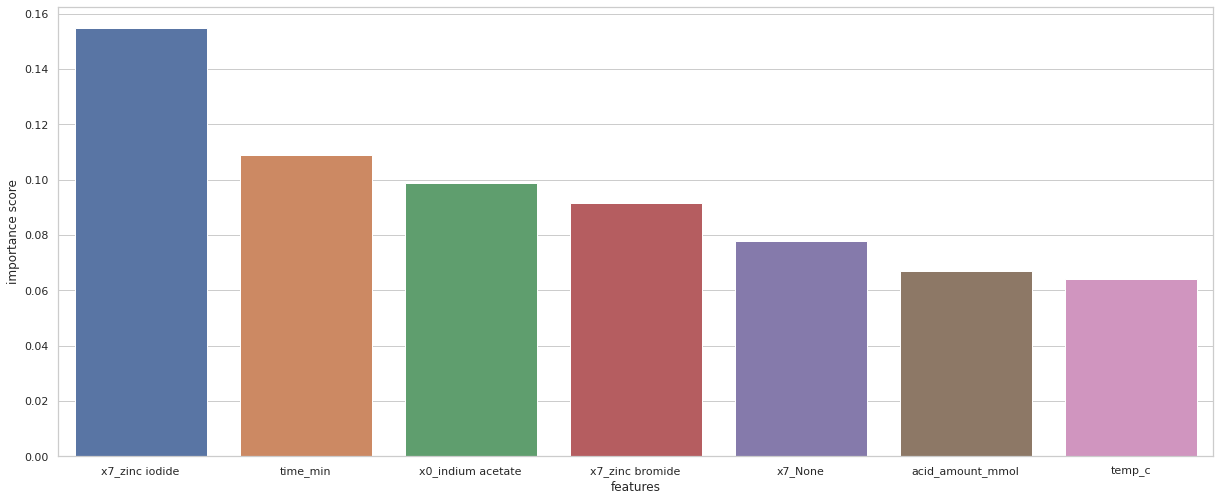

In [21]:
top7_e = DataFrame(sorted_importance_e[0:7], columns=['features', 'importance score'])

others_e = DataFrame(sorted_importance_e[7:], columns=['features', 'importance score'])

# combined_others2 = pd.DataFrame(data = {
#     'features' : ['others'],
#     'importance score' : [others2['importance score'].sum()]
# })

# #combining top 10 with others
# imp_score2 = pd.concat([top7, combined_others2])

import seaborn as sns

a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="features", y="importance score", data=top7_e)

### Absorption prediction

In [23]:
importance_dict_a = dict()
for i in range(0,58):
    importance_dict_a[input_col[i]] = ET_regr_a.feature_importances_[i]

sorted_importance_a = sorted(importance_dict_a.items(), key=lambda x: x[1], reverse=True)

sorted_importance_a

[('time_min', 0.20109576744800167),
 ('temp_c', 0.17996238282770485),
 ('x7_zinc iodide', 0.08783666032159622),
 ('x7_zinc oleate', 0.05637476600045364),
 ('acid_amount_mmol', 0.04279734360517702),
 ('in_amount_mmol', 0.03256383228051722),
 ('total_volume_ml', 0.03145001681652341),
 ('x7_zinc bromide', 0.030739067561035706),
 ('p_amount_mmol', 0.02999352180694652),
 ('x8_water', 0.02616437541519663),
 ('amine_amount_mmol', 0.023855125638689023),
 ('x1_tris(dimethylamino)phosphine', 0.023580753832533937),
 ('x0_indium iodide', 0.022562810867898124),
 ('x5_octylamine', 0.021443014903919057),
 ('zinc_amount_mmol', 0.020918267894993493),
 ('x4_oleic acid', 0.020840240043172843),
 ('x3_None', 0.017052180504391824),
 ('TOP_amount_mmol', 0.01565860617570664),
 ('x4_lauric acid', 0.01545318423074455),
 ('x4_myristic acid', 0.011902167873690183),
 ('x4_stearic acid', 0.010453815069404487),
 ('x0_indium acetate', 0.010125425161624325),
 ('x5_dioctylamine', 0.0099454298859125),
 ('other_amount_mm

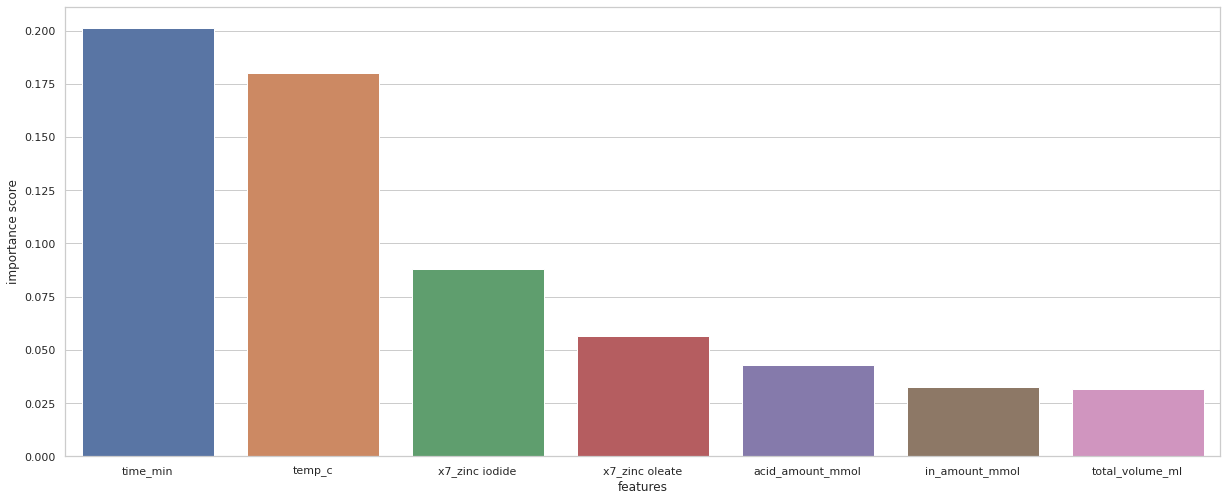

In [24]:
top7_a = DataFrame(sorted_importance_a[0:7], columns=['features', 'importance score'])

others_a = DataFrame(sorted_importance_a[7:], columns=['features', 'importance score'])

import seaborn as sns

a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="features", y="importance score", data=top7_a)

In [25]:
importance_dict_a

{'in_amount_mmol': 0.03256383228051722,
 'p_amount_mmol': 0.02999352180694652,
 'sol_amount_ml': 0.0010912458015472422,
 'TOP_amount_mmol': 0.01565860617570664,
 'acid_amount_mmol': 0.04279734360517702,
 'amine_amount_mmol': 0.023855125638689023,
 'thiol_amount_mmol': 0.0,
 'zinc_amount_mmol': 0.020918267894993493,
 'other_amount_mmol': 0.00959131885592658,
 'total_volume_ml': 0.03145001681652341,
 'temp_c': 0.17996238282770485,
 'time_min': 0.20109576744800167,
 'x0_indium acetate': 0.010125425161624325,
 'x0_indium bromide': 0.00010235835717290251,
 'x0_indium chloride': 0.0027404621712491975,
 'x0_indium iodide': 0.022562810867898124,
 'x0_indium myristate': 0.0,
 'x0_indium trifluoroacetate': 0.00024269032604423954,
 'x1_bis(trimethylsilyl)phosphine': 0.00023679811593291104,
 'x1_phosphorus trichloride': 0.0,
 'x1_tris(diethylamino)phosphine': 0.0038210390381117638,
 'x1_tris(dimethylamino)phosphine': 0.023580753832533937,
 'x1_tris(trimethylgermyl)phosphine': 0.0,
 'x1_tris(trimet

### Combine


In [26]:
sorted_a = sorted(importance_dict_a.items(), key=lambda x: x[0], reverse=False)
sorted_d = sorted(importance_dict_d.items(), key=lambda x: x[0], reverse=False)
sorted_e = sorted(importance_dict_e.items(), key=lambda x: x[0], reverse=False)


In [27]:
sorted_d 

[('TOP_amount_mmol', 0.0015290178702596494),
 ('acid_amount_mmol', 0.005184525737431052),
 ('amine_amount_mmol', 0.03637355292221555),
 ('in_amount_mmol', 0.01620215432071895),
 ('other_amount_mmol', 0.006764429720962395),
 ('p_amount_mmol', 0.029930858398343897),
 ('sol_amount_ml', 0.0020430996975447763),
 ('temp_c', 0.0777631515484468),
 ('thiol_amount_mmol', 0.0),
 ('time_min', 0.07708367016514253),
 ('total_volume_ml', 0.20297332059063816),
 ('x0_indium acetate', 0.0),
 ('x0_indium bromide', 9.978493124670069e-05),
 ('x0_indium chloride', 0.007454484380334543),
 ('x0_indium iodide', 0.0),
 ('x0_indium myristate', 0.0),
 ('x0_indium trifluoroacetate', 0.28324582222296196),
 ('x1_bis(trimethylsilyl)phosphine', 0.00015058627819931742),
 ('x1_phosphorus trichloride', 0.0),
 ('x1_tris(diethylamino)phosphine', 0.0011796205469555337),
 ('x1_tris(dimethylamino)phosphine', 0.0010044433596308954),
 ('x1_tris(trimethylgermyl)phosphine', 0.0),
 ('x1_tris(trimethylsilyl)phosphine', 0.0061712182

In [28]:
combined_importance = dict()

In [29]:
for i in range(0,71):
    combined_importance[sorted_e[i][0]] = sorted_e[i][1] + sorted_a[i][1] + sorted_d[i][1]
combined_importance


IndexError: list index out of range

In [30]:
sorted_combined_importance = sorted(combined_importance.items(), key=lambda x: x[1], reverse=True)

sorted_combined_importance 

[('time_min', 0.3872562339475478),
 ('temp_c', 0.3216737419642217),
 ('x0_indium trifluoroacetate', 0.2834885125490062),
 ('x7_zinc iodide', 0.2723986410800271),
 ('total_volume_ml', 0.2674964373401648),
 ('x7_zinc bromide', 0.12329813949250065),
 ('acid_amount_mmol', 0.11506402357882795),
 ('x7_zinc oleate', 0.11183675782485239),
 ('x0_indium acetate', 0.10910125442900923),
 ('x4_myristic acid', 0.10229340390208516),
 ('x7_None', 0.08627551234812816),
 ('p_amount_mmol', 0.08135532959305466),
 ('x0_indium iodide', 0.0750972416516475),
 ('zinc_amount_mmol', 0.07073262501564995),
 ('amine_amount_mmol', 0.06080881474654413),
 ('in_amount_mmol', 0.05178417815078243),
 ('x5_dioctylamine', 0.047583032410539336),
 ('x7_zinc chloride', 0.04546968404496203),
 ('other_amount_mmol', 0.03368623485490694),
 ('x4_oleic acid', 0.03309251810969427),
 ('x1_tris(dimethylamino)phosphine', 0.02835231528073659),
 ('x8_water', 0.026176693500295934),
 ('x2_octadecene', 0.024935156804378376),
 ('x5_octylamine

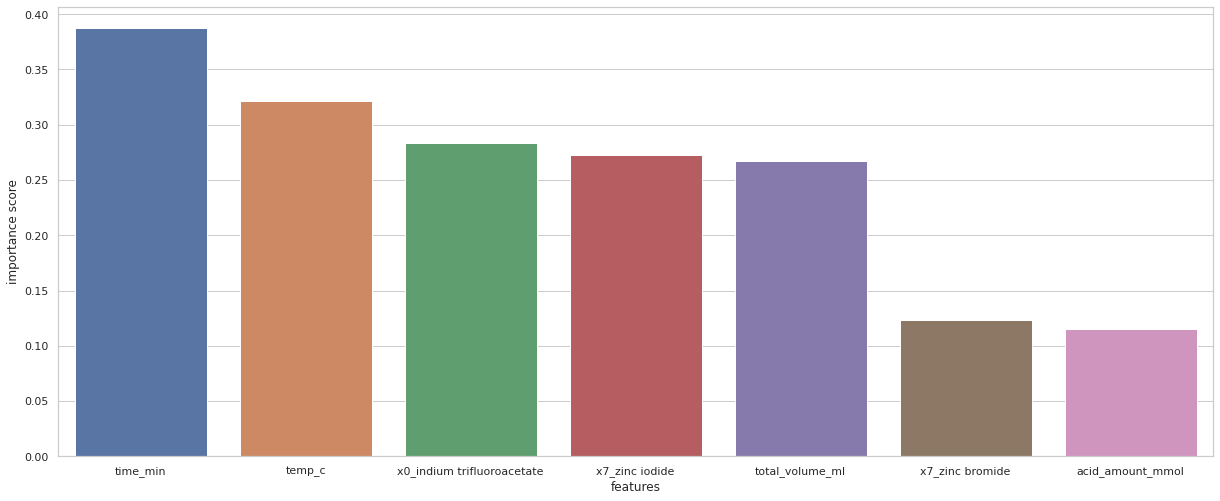

In [31]:
top7_combined = DataFrame(sorted_combined_importance[0:7], columns=['features', 'importance score'])

others_combined = DataFrame(sorted_combined_importance [7:], columns=['features', 'importance score'])

import seaborn as sns

a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="features", y="importance score", data=top7_combined)

## Correlation

In [4]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [5]:
FeatureMatrix = ['in_amount_mmol',
             'p_amount_mmol',
             'sol_amount_ml',
             'TOP_amount_mmol',
             'acid_amount_mmol',
             'amine_amount_mmol',
             'thiol_amount_mmol',
             'zinc_amount_mmol',
             'other_amount_mmol',
             'total_volume_ml']

Output = ['diameter_nm', 'emission_nm', 'abs_nm']

FeatureMatrix_and_outputs = ['in_amount_mmol',
             'p_amount_mmol',
             'sol_amount_ml',
             'TOP_amount_mmol',
             'acid_amount_mmol',
             'amine_amount_mmol',
             'thiol_amount_mmol',
             'zinc_amount_mmol',
             'other_amount_mmol',
             'total_volume_ml',
             'temp_c',
             'time_min','diameter_nm', 'emission_nm', 'abs_nm']
df_corr = df[FeatureMatrix_and_outputs]
df_corr

,in_amount_mmol,p_amount_mmol,sol_amount_ml,TOP_amount_mmol,acid_amount_mmol,amine_amount_mmol,thiol_amount_mmol,zinc_amount_mmol,other_amount_mmol,total_volume_ml,temp_c,time_min,diameter_nm,emission_nm,abs_nm
0,-0.205407,-0.376673,1.638502,-0.220165,0.095362,-0.800754,0,-0.682991,2.533209,1.502083,0.834870,1.644452,3.500000,618,562
1,-0.205407,-0.376673,1.638502,-0.220165,0.095362,-0.800754,0,-0.682991,2.533209,1.502083,-0.014884,0.118842,1.916667,574,473
2,-0.205407,-0.376673,1.638502,-0.220165,0.095362,-0.800754,0,-0.682991,2.533209,1.502083,0.409993,0.118842,2.907619,574,524
3,-0.205407,-0.376673,1.638502,-0.220165,0.095362,-0.800754,0,-0.682991,2.533209,1.502083,0.834870,0.118842,2.907619,590,538
4,-0.205407,-0.376673,1.638502,-0.220165,0.095362,-0.800754,0,-0.682991,2.533209,1.502083,1.259747,0.118842,2.907619,618,576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,-0.467859,-0.729457,-0.258929,0.421871,-0.453863,-0.800754,0,-0.682991,-0.239089,-0.333650,-0.014884,-0.271036,2.907619,601,552
146,-0.717189,-0.779855,-0.069186,-0.220165,-0.344018,-0.800754,0,-0.682991,-0.239089,-0.210862,1.259747,1.644452,8.300000,590,532
147,-0.717189,-0.779855,-0.069186,-0.220165,-0.344018,-0.800754,0,-0.682991,-0.239089,-0.210862,1.259747,-0.338841,8.300000,618,570
148,-0.717189,-0.779855,-0.069186,-0.220165,-0.344018,-0.800754,0,-0.682991,-0.239089,-0.210862,1.259747,0.118842,8.300000,618,562


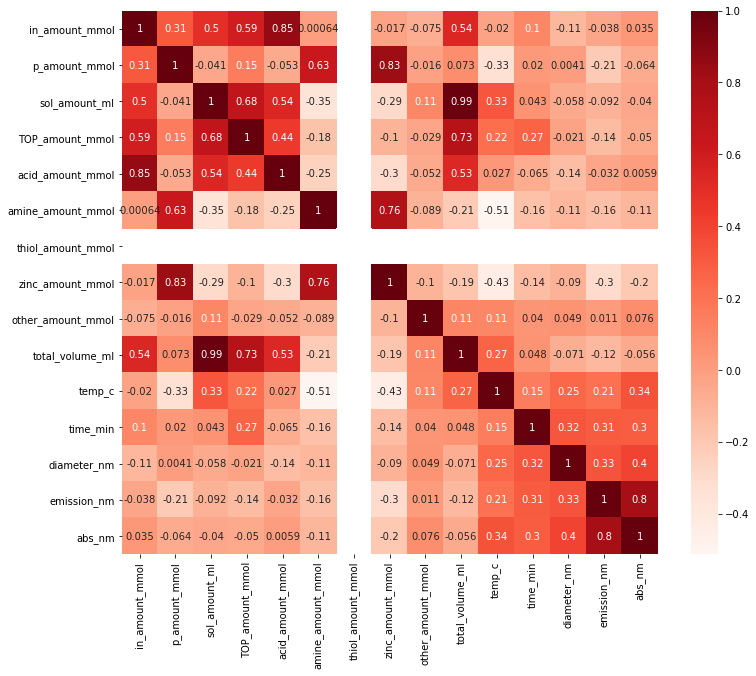

In [6]:

X_cor = df[FeatureMatrix]  #Feature Matrix
y_cor = df[Output]          #Target Variable

#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_corr.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()